## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
Regression predicts a continuous numeric value. Classification predicts a categorical label.
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
A confusion matrix is a type of table that compares predicted labels with actual labels. It shows how many predictions were correct and what types of mistakes the model made.
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
Accuracy is the percent of correct predictions. Looking at accuracy can be misleading if the data is not in balance because a model can ultimately still look accurate even though there were some important mistakes.
4. What does the root mean squared error quantify about a particular model?
RMSE measures how far predictions are from the true values in regression. When the RMSE is lower, this means there are better predictions.
5. What are overfitting and underfitting?
Overfitting happens when a model learns and gets used to the training data and performs bad on new data. Underfitting happens when a model is too simple and performs poorly on both training and new data.
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
Splitting data into training and testing sets helps evaluate how the model performs on new data. When k is chosen based off of test performance, it helps prevent overfittting.
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
Prediction gives an overall clear answer but it doesn't really give any information about the certainty and uncertainty of the the answer. Probability distribution provides more insight about uncertainty, but you have to have a threshold to make your final decision. 



**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [54]:
## 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv("/Users/eliab.e/Analytics/ml_container/undergrad_ml_assignments/data/land_mines.csv")
print(df.head())


print("\nMine type counts:")
print(df["mine_type"].value_counts().sort_index())

print("\nFeature summary:")
print(df[["voltage", "height", "soil"]].describe())

print("\nFeature correlations:")
print(df[["voltage", "height", "soil"]].corr())

    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1

Mine type counts:
mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64

Feature summary:
          voltage      height        soil
count  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550
std      0.195819    0.306043    0.344244
min      0.197734    0.000000    0.000000
25%      0.309737    0.272727    0.200000
50%      0.359516    0.545455    0.600000
75%      0.482628    0.727273    0.800000
max      0.999999    1.000000    1.000000

Feature correlations:
          voltage    height      soil
voltage  1.000000 -0.377523  0.070673
height  -0.377523  1.000000 -0.006957
soil     0.070673 -0.006957  1.000000


In [55]:
## 2
X = df[["voltage", "height", "soil"]]
y = df["mine_type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 169
Test size: 169


In [56]:
## 3

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


k_values = [1, 3, 5, 7, 9, 11, 13, 15]
best_k = None
best_acc = -1

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_s, y_train)
    preds = model.predict(X_test_s)
    acc = accuracy_score(y_test, preds)
    if acc > best_acc:
        best_acc = acc
        best_k = k

print("Best k:", best_k)
print("Best accuracy:", best_acc)

Best k: 1
Best accuracy: 0.5088757396449705


I used different values for k and picked th one with the highest accuracy on the test set

In [57]:
## 4
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train_s, y_train)
y_pred = best_model.predict(X_test_s)

labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=[f"Actual {c}" for c in labels],
                     columns=[f"Pred {c}" for c in labels])

print("Confusion Matrix:")
print(cm_df)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
          Pred 1  Pred 2  Pred 3  Pred 4  Pred 5
Actual 1      22       0       3       3       8
Actual 2       0      32       0       3       0
Actual 3       7       0      10       9       7
Actual 4       6       5       4      13       5
Actual 5       6       0      10       7       9

Accuracy: 0.5088757396449705


### 5)
Due to the amount of mistakes the model makes, i think it should be used as more of a learning tool rather than fully depending on it to make predictions.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [58]:
## 1)
df = pd.read_csv("/Users/eliab.e/Analytics/ml_container/undergrad_ml_assignments/data/USA_cars_datasets.csv")
df = df[["price", "year", "mileage"]]                                                      

print(df.shape)
print(df.isna().sum())
print(df.head())

(2499, 3)
price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


In [59]:
## 2)
from sklearn.preprocessing import MinMaxScaler

X = df[["year", "mileage"]]
y = df["price"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(X.min(axis=0))
print(X.max(axis=0))

[0. 0.]
[1. 1.]


In [60]:
## 3)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 1999
Test size: 500


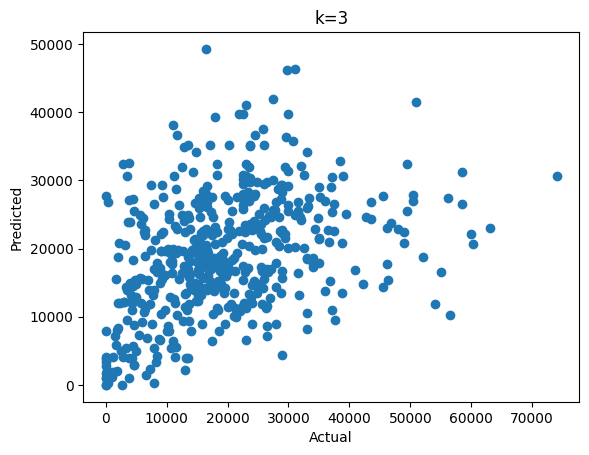

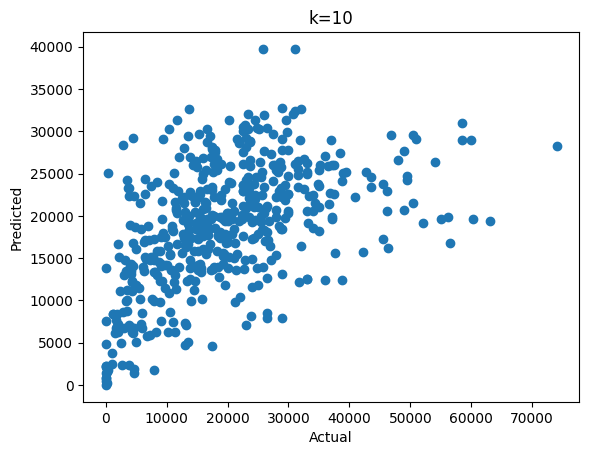

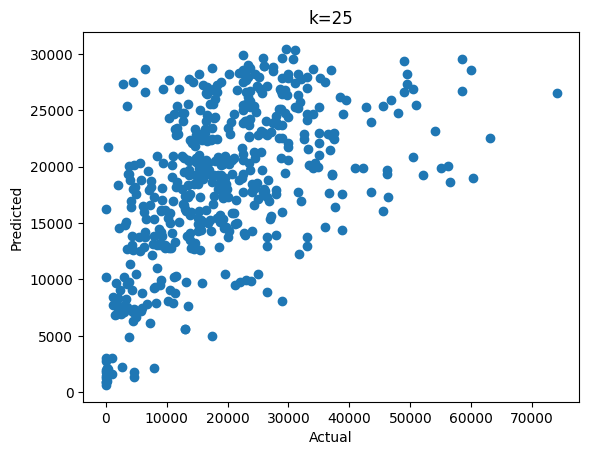

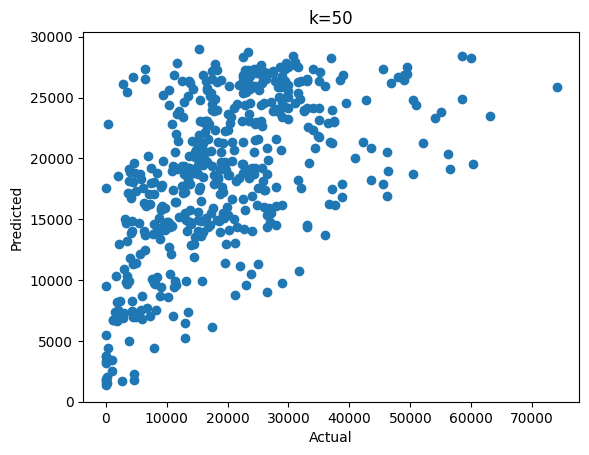

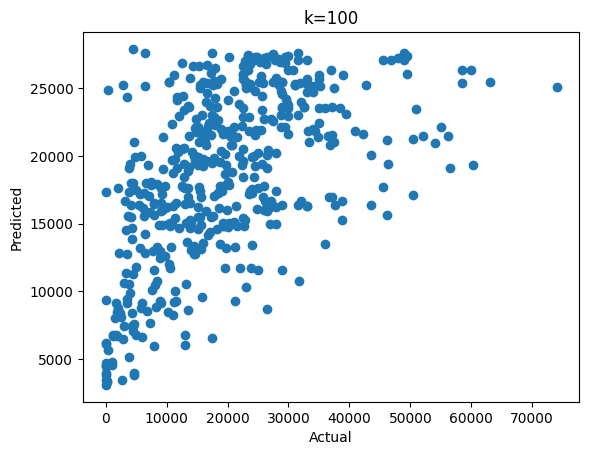

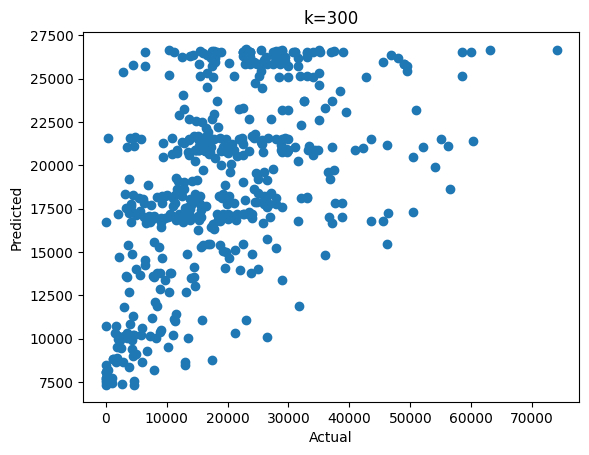

{3: 148104157.1862222, 10: 117399126.10604002, 25: 112600455.15990078, 50: 110202287.21426159, 100: 112250845.4893072, 300: 114497778.21548478}


In [61]:
## 4)
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]
mse = {}

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    mse[k] = mean_squared_error(y_test, pred)
    
    plt.scatter(y_test, pred)
    plt.title(f"k={k}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

print(mse)

In [62]:
## 5)
best_k = min(mse, key=mse.get)
print("Optimal k:", best_k)

Optimal k: 50


As k increases to the middle values, predictions become smoother and start averaging out.

### 6) When k is smaller, the model tends to overfit because it focuses on nearby points which in turn makes the points scattered. As it grows larger, k tends to underfit due to it averaging the neighbors and cluster them.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [63]:
## 1)
import pandas as pd

df = pd.read_csv("/Users/eliab.e/Analytics/ml_container/undergrad_ml_assignments/data/heart_failure_clinical_records_dataset.csv")

df.isna().sum()   # check missing values
df = df.drop(columns=["time"])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [64]:
## 2)
corr = df.corr(numeric_only=True)
corr["DEATH_EVENT"].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
Name: DEATH_EVENT, dtype: float64

the variables that are most strongly associated with death was serum creatinine and age

In [65]:
## 3) 
dummy_vars = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

for v in dummy_vars:
    print(v)
    print(df.groupby(v)["DEATH_EVENT"].mean(), "\n")

anaemia
anaemia
0    0.294118
1    0.356589
Name: DEATH_EVENT, dtype: float64 

diabetes
diabetes
0    0.321839
1    0.320000
Name: DEATH_EVENT, dtype: float64 

high_blood_pressure
high_blood_pressure
0    0.293814
1    0.371429
Name: DEATH_EVENT, dtype: float64 

sex
sex
0    0.323810
1    0.319588
Name: DEATH_EVENT, dtype: float64 

smoking
smoking
0    0.325123
1    0.312500
Name: DEATH_EVENT, dtype: float64 



When the variable equaled 1, patients with anaemia and high blood pressure had higher deaths. Other categories did not do the same.

In [66]:
## 4)
X = df[["serum_creatinine", "ejection_fraction", "age"]]  # adjust based on Q2/Q3
y = df["DEATH_EVENT"]

In [67]:
## 5) 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.min(), X_scaled.max()

(np.float64(0.0), np.float64(1.0))

In [68]:
## 6)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
len(X_train), len(X_test)

(239, 60)

In [69]:
## 7)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_vals = [1, 3, 5, 10, 25, 50]
mse_sel = {}

for k in k_vals:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse_sel[k] = mean_squared_error(y_test, pred)

best_k_sel = min(mse_sel, key=mse_sel.get)
best_k_sel

25

In [70]:
## 8)
X_all = df.drop(columns=["DEATH_EVENT"])
y = df["DEATH_EVENT"]

scaler = MinMaxScaler()
X_all = scaler.fit_transform(X_all)

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42
)

mse_all = {}
for k in k_vals:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse_all[k] = mean_squared_error(y_test, pred)

best_k_all = min(mse_all, key=mse_all.get)
best_k_all

25

The k that best fit both models was 25. Using more variables did not significantly improve the performance of the model. This shows that adding more features does not always mean a better model when it comes to kNN

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)